In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
from photutils import centroid_com
from astropy.modeling import models, fitting
from scipy import asarray as ar,exp


# This notebook examines results from march 21, 2021 run on catch-22-1 target observed in the 20170518 folder
### Folders inside 'reductions/p200_dbsp_red_A':
- __Science__: these are fits datatables
- __QA__: png image files showing residuals etc. for wl solution
- __Masters__: fits images of arcs,bias,flats,tilt,wlcalib, etc.


__Science__ requires work to understand;
__QA__ can be opened as a photo; 
__Masters__ can be opened with ds9

# Science folder -------------------------------------------------
### One file exploration

In [2]:
# ## grab one fits file to explore; txt also exist


# #specify a file
# filename = 'spec1d_red0098-79005021831220-Catch22_DBSPr_2017May18T112014.257.fits' #change file here
# #open file
# image_file = 'reductions/p200_dbsp_red_A/Science/{}'.format(filename)
# hdu_list = fits.open(image_file)
# #find data
# hdu_list.info() #this is NOT an image

In [3]:
# #store data in a variable
# thedata = hdu_list[1].data 
# #close file
# hdu_list.close()
# #open thedata in table format
# table = Table(thedata)
# table

### generalize to examine all files
## Science 1d & 2d _.fits_ files

In [4]:
# print all filenames
dim_options = ['1d', '2d'] #only 1d have .txt options
number_options = ['098', '099', '100', '101', '102', ] #original obs. log number
end_options = ['T112014.257','T112357.399','T112740.547','T113123.686','T113555.356'] #all beyond May18..until ext
ext_options = ['.fits','.txt'] #only 1d have .txt options and this code wont open .txt files

print('all file names:')
for i in range(len(number_options)):
    #establish filename for 2d options
    specD = dim_options[1]
    fnumber = number_options[i]
    fend =  end_options[i]
    ext = ext_options[0]
    filename = 'spec{}_red0{}-79005021831220-Catch22_DBSPr_2017May18{}{}'.format(specD,fnumber,fend,ext)
    print('{}.'.format(i),filename)
    #establish filename for 1d options
    specD = dim_options[0]
    fnumber = number_options[i]
    fend =  end_options[i]
    ext = ext_options[0] #fits first
    filename = '   spec{}_red0{}-79005021831220-Catch22_DBSPr_2017May18{}{}'.format(specD,fnumber,fend,ext)
    print(filename)
    ext = ext_options[1] #txt second
    filename = '   spec{}_red0{}-79005021831220-Catch22_DBSPr_2017May18{}{}'.format(specD,fnumber,fend,ext)
    print(filename)

all file names:
0. spec2d_red0098-79005021831220-Catch22_DBSPr_2017May18T112014.257.fits
   spec1d_red0098-79005021831220-Catch22_DBSPr_2017May18T112014.257.fits
   spec1d_red0098-79005021831220-Catch22_DBSPr_2017May18T112014.257.txt
1. spec2d_red0099-79005021831220-Catch22_DBSPr_2017May18T112357.399.fits
   spec1d_red0099-79005021831220-Catch22_DBSPr_2017May18T112357.399.fits
   spec1d_red0099-79005021831220-Catch22_DBSPr_2017May18T112357.399.txt
2. spec2d_red0100-79005021831220-Catch22_DBSPr_2017May18T112740.547.fits
   spec1d_red0100-79005021831220-Catch22_DBSPr_2017May18T112740.547.fits
   spec1d_red0100-79005021831220-Catch22_DBSPr_2017May18T112740.547.txt
3. spec2d_red0101-79005021831220-Catch22_DBSPr_2017May18T113123.686.fits
   spec1d_red0101-79005021831220-Catch22_DBSPr_2017May18T113123.686.fits
   spec1d_red0101-79005021831220-Catch22_DBSPr_2017May18T113123.686.txt
4. spec2d_red0102-79005021831220-Catch22_DBSPr_2017May18T113555.356.fits
   spec1d_red0102-79005021831220-Catch2

In [5]:
#open .fits files


dim_options = ['1d', '2d'] #only 1d have .txt options
number_options = ['098', '099', '100', '101', '102', ] #original obs. log number
end_options = ['T112014.257','T112357.399','T112740.547','T113123.686','T113555.356'] #all beyond May18..until ext
ext_options = ['.fits','.txt'] #only 1d have .txt options and this code wont open .txt files

print('all 1D .fits FILES have these same columns AND need to be opened with python:')
for i in range(len(number_options)):
    #establish filename
    specD = dim_options[0]
    fnumber = number_options[i]
    fend =  end_options[i]
    ext = ext_options[0]
    filename = 'spec{}_red0{}-79005021831220-Catch22_DBSPr_2017May18{}{}'.format(specD,fnumber,fend,ext)
    #open file
    science_file = 'reductions/p200_dbsp_red_A/Science/{}'.format(filename)
    hdu_list = fits.open(science_file)
    #store data in a variable
    thedata = hdu_list[1].data 
    #close file
    hdu_list.close()
    #open thedata in table format
    scitable = Table(thedata)
#     scitable #to look at full data table
#     print('\nLooking at File "{}":'.format(filename)) #useful w/o break in this for loop
    print('\n   Columns: {}'.format(scitable.colnames))
    break

print('\nall 2D .fits FILES have cols0 thru cols439. AND can be opened in ds9!')
##comment out b/c long to print out results when results summarized in print stmt above
# for i in range(len(number_options)):
#     #establish filename
#     specD = dim_options[1]
#     fnumber = number_options[i]
#     fend =  end_options[i]
#     ext = ext_options[0]
#     filename = 'spec{}_red0{}-79005021831220-Catch22_DBSPr_2017May18{}{}'.format(specD,fnumber,fend,ext)
#     #open file
#     science_file = 'reductions/p200_dbsp_red_A/Science/{}'.format(filename)
#     hdu_list = fits.open(science_file)
#     #store data in a variable
#     thedata = hdu_list[1].data 
#     #close file
#     hdu_list.close()
#     #open thedata in table format
#     scitable = Table(thedata)
#     print('\nLooking at File "{}":'.format(filename))
#     print('\nColumns: {}'.format(scitable.colnames))

all 1D .fits FILES have these same columns AND need to be opened with python:

   Columns: ['TRACE_SPAT', 'FWHMFIT', 'OPT_WAVE', 'OPT_COUNTS', 'OPT_COUNTS_IVAR', 'OPT_COUNTS_SIG', 'OPT_COUNTS_NIVAR', 'OPT_MASK', 'OPT_COUNTS_SKY', 'OPT_COUNTS_RN', 'OPT_FRAC_USE', 'OPT_CHI2', 'BOX_NPIX', 'BOX_WAVE', 'BOX_COUNTS', 'BOX_COUNTS_IVAR', 'BOX_COUNTS_SIG', 'BOX_COUNTS_NIVAR', 'BOX_MASK', 'BOX_COUNTS_SKY', 'BOX_COUNTS_RN']

all 2D .fits FILES have cols0 thru cols439. AND can be opened in ds9!


In [6]:
print('\nTo see 1D .fits spectra \n1. cd to "p200_dbsp_red_A" \n2. with {}==filename, run in terminal: \n   $ pypeit_show_1dspec Science/{} ')
print('\nA GUI will launch to see the 1D spectrum')



To see 1D .fits spectra 
1. cd to "p200_dbsp_red_A" 
2. with {}==filename, run in terminal: 
   $ pypeit_show_1dspec Science/{} 

A GUI will launch to see the 1D spectrum


### 1d Red side spectrum for Catch22-1:
#### my original reduction  (top), Pypeit reduction (bottom)
<img src="Images/my_1d.png" width="850" />
<img src="Images/pypeit_1d.png" width="915" /> 

## See [link](https://linetools.readthedocs.io/en/latest/xspecgui.html) for help with GUI

# Science 2d spectra -- Attempt to do Halpha trace using pypeit reduced 2d file

In [7]:
#test opening pypeit reduced 2d image
start_path = 'reductions/p200_dbsp_red_A/Science/'
image_file = '{}spec2d_red0098-79005021831220-Catch22_DBSPr_2017May18T112014.257.fits'.format(start_path)
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4114, 440)


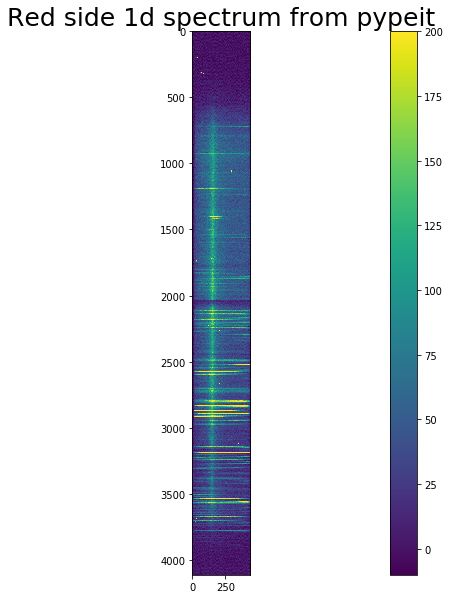

In [8]:
plt.figure(figsize=(50,10))
plt.imshow(image_data, vmin=-10, vmax =200 ,cmap='viridis')
plt.colorbar();plt.title('Red side 1d spectrum from pypeit',fontsize=25);

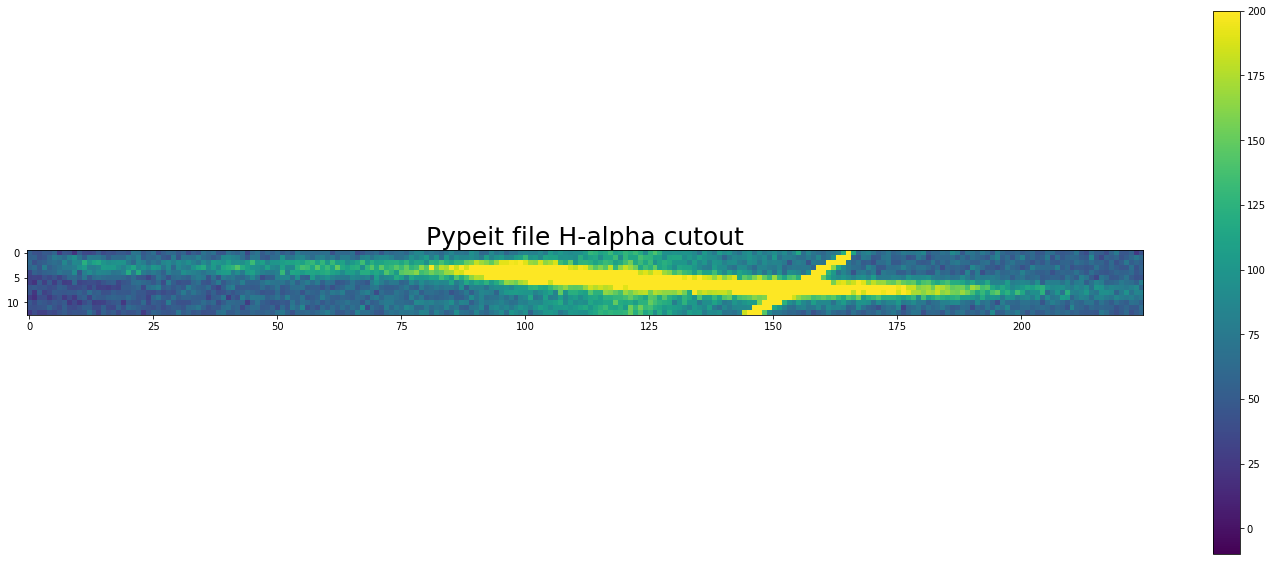

In [9]:
#gonna try to slice out h-alpha

#spectral axis 
ha_lowerlim = 1396
ha_upperlim = 1409
#positional axis
target_lowerlim = 35
target_upperlim = 260
#select ha
ha_only = image_data[ha_lowerlim: ha_upperlim, target_lowerlim: target_upperlim ] #[wl,pos] is opposite to my version
#plot ha
plt.figure(figsize=(25,10))
plt.imshow(ha_only, vmin=-10, vmax =200 ,cmap='viridis')
plt.title('Pypeit file H-alpha cutout',fontsize=25)
plt.colorbar();

### Compare this to My H-alpha cutout
<img src="Images/my_ha_cutout.png" width="915" /> 

### Getting a wider view of that streak

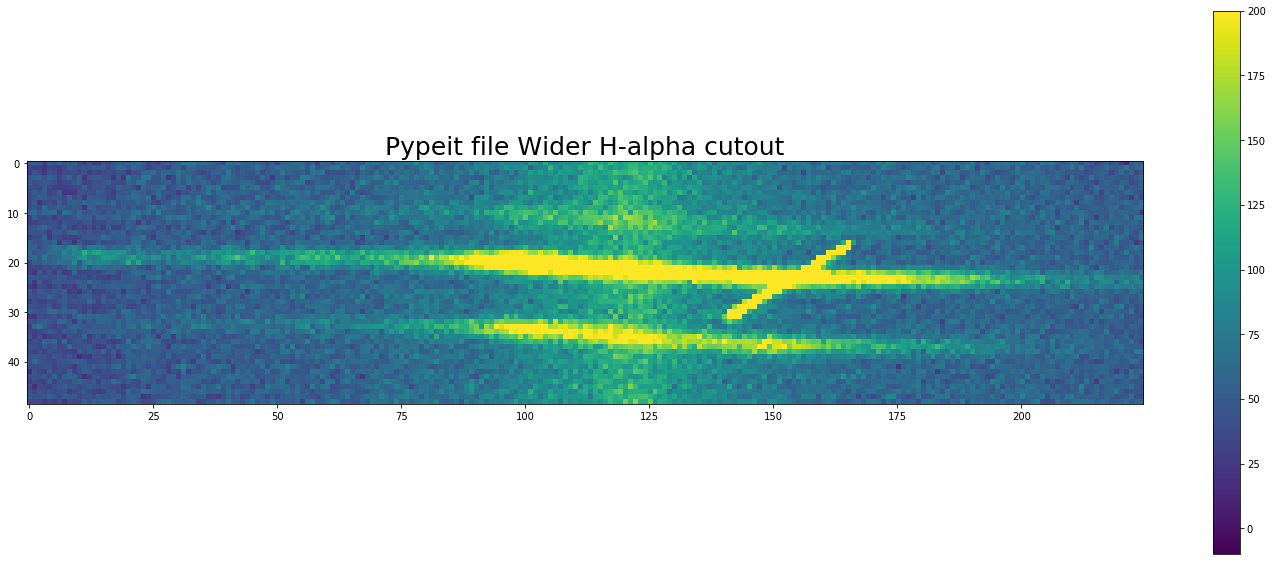

In [10]:
#wider Pypeit halpha cutout to see cause of streak

#spectral axis 
ha_lowerlim = 1380
ha_upperlim = 1429
#positional axis
target_lowerlim = 35
target_upperlim = 260
#select ha
ha_only = image_data[ha_lowerlim: ha_upperlim, target_lowerlim: target_upperlim ] #[wl,pos] is opposite to my version
#plot ha
plt.figure(figsize=(25,10))
plt.imshow(ha_only, vmin=-10, vmax =200 ,cmap='viridis')
plt.title('Pypeit file Wider H-alpha cutout',fontsize=25)
plt.colorbar();

<img src="Images/my_ha_wider_cutout.png" width="915" /> 
### Compare the wider cutout from Pypeit to mine.
#### H-alpha is the central emission line
#### Also note that these are the same y-axis (positional) pixel values cut out for both


Transposed data to get it to work with my previous code 
since my reduction expects vertical orientation but pypeit does something to give horizontal


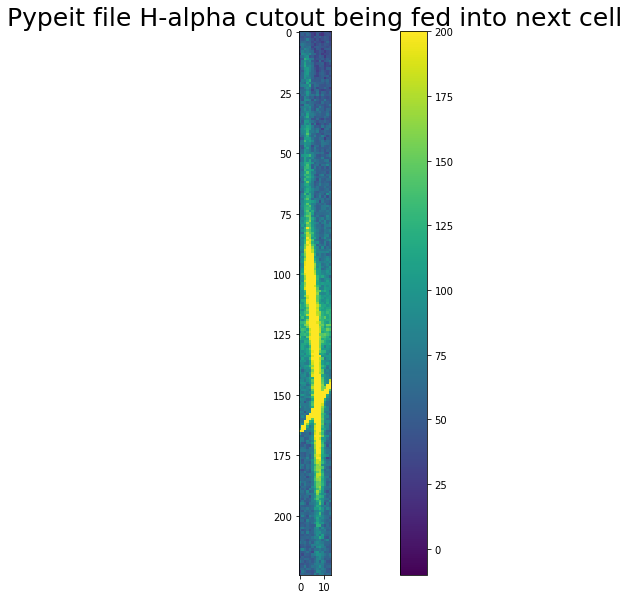

In [11]:
type(image_data),image_data.shape

print('Transposed data to get it to work with my previous code',
      '\nsince my reduction expects vertical orientation but pypeit does something to give horizontal')
#see what data goes into the centroid for loop in next cell
new_short = image_data[1396:1409,35:260] #had to switch to [wl,pos] order again; mine used[pos,wl]
plt.figure(figsize=(25,10))
plt.imshow(np.transpose(new_short), vmin=-10, vmax =200 ,cmap='viridis')
plt.title('Pypeit file H-alpha cutout being fed into next cell',fontsize=25)
plt.colorbar();

Note b/c of software versions: 
- HF laptop needs order centroid_ys, centroid_xs
- NAC laptop needs order centroid_xs, centroid_ys 

(225, 13)


(1398, 1415)

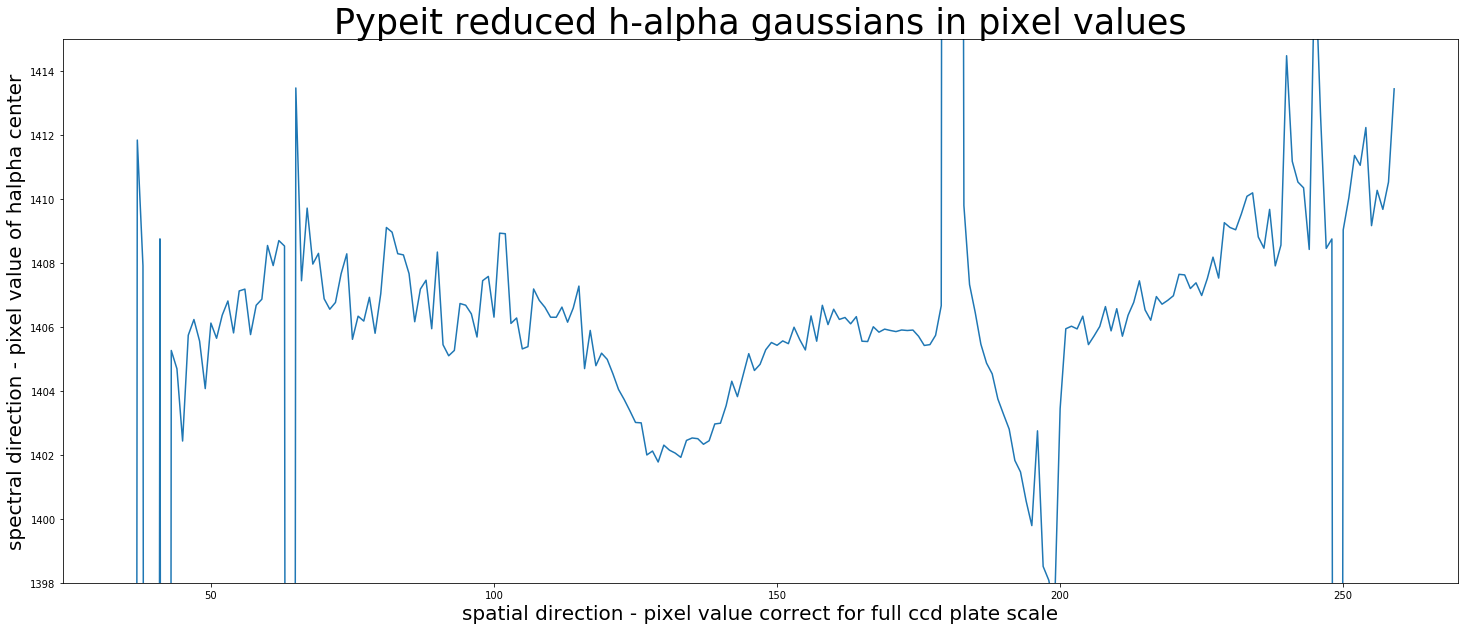

In [17]:
#try to do a centroid on this to see if looks like mine

#transposed to get my code to work b/c of my original orientation: me=vertical; pypeit=horizontal
new_short = np.transpose(image_data[1396:1409,35:260]) #had to switch to [wl,pos] order again; mine used[pos,wl]
print(np.shape(new_short))

#gets halpha centroids/gaussians/uncertainities in target gal's range
mylist_ys2=[];centroids_pix=[];gfit_vals=[];stddev=[];means=[];means_unc=[]
for count,row in enumerate(new_short): 
#     print('big test:',row)
    #calculates centroids per row
    flux_fake2d2 = row[:,np.newaxis] #makes each row array into a fake2d
    centroid_xs, centroid_ys = centroid_com(flux_fake2d2)#finds center(x,y) of halpha for each row array
    mylist_ys2.append(centroid_ys)
#     print(centroid_xs, centroid_ys,len(row))
    centroids_pix.append(centroid_xs) #collects all halpha centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean = centroid_xs
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value)
    means.append(gaussian.mean.value)

    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    means_unc.append(fit_g.fit_info['param_cov'])
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #if throws error use line above instead
#     print('this is fit_g:',fit_g)
#     print('this is fit_info:',fit_g.fit_info)
#     if count == 10:
#         break
#     else:
#         continue


    
#end of for loop  - making things into arrays so easier to work with  
centroids_pix=np.array(centroids_pix) #halpha centroids (wl) array
gfit_vals = np.array(gfit_vals)  #all gaussian outputs in pixels
stddev = np.array(stddev) #std of gaussians in pixels
means = np.array(means) #gaussian peaks in pixels


#just changing varaiables for plotting ease
ha_range_correction = 1396
space_pix_correction = 35
centroid_specpix_fullccd = centroids_pix + ha_range_correction
gaussmax_specpix_fullccd = means + stddev + ha_range_correction
gauss_mean = means + ha_range_correction
target_spacepix_fullccd = np.arange(len(centroids_pix)) +space_pix_correction

#plot results

#plotting
plt.figure(figsize=(25,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(target_spacepix_fullccd,gaussmax_specpix_fullccd)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('Pypeit reduced h-alpha gaussians in pixel values',fontsize=35)
#plt.ylim(1393,1407)
plt.ylim(1398,1415)

## compare to my reduced version
- note that the 3 wild fits (two surrounding x=50 & one around x=250) are consistent 
- pypeit version also has streak in 2d that displays in trace plot as spike then drop leading up to x=200
- so orientations are correct its really the data values causing problems
<img src="Images/my_ha_trace_gauss.png" width="850" />

In [18]:
print('Could try to plot centroids to see if that was better,',
      '\nbut that streak in the pypeit version is probably the real cause of this poor trace.',
      '\nCan also try other targets or play with reduction to fix streak')

Could try to plot centroids to see if that was better, 
but that streak in the pypeit version is probably the real cause of this poor trace. 
Can also try other targets or play with reduction to fix streak


(1399, 1405)

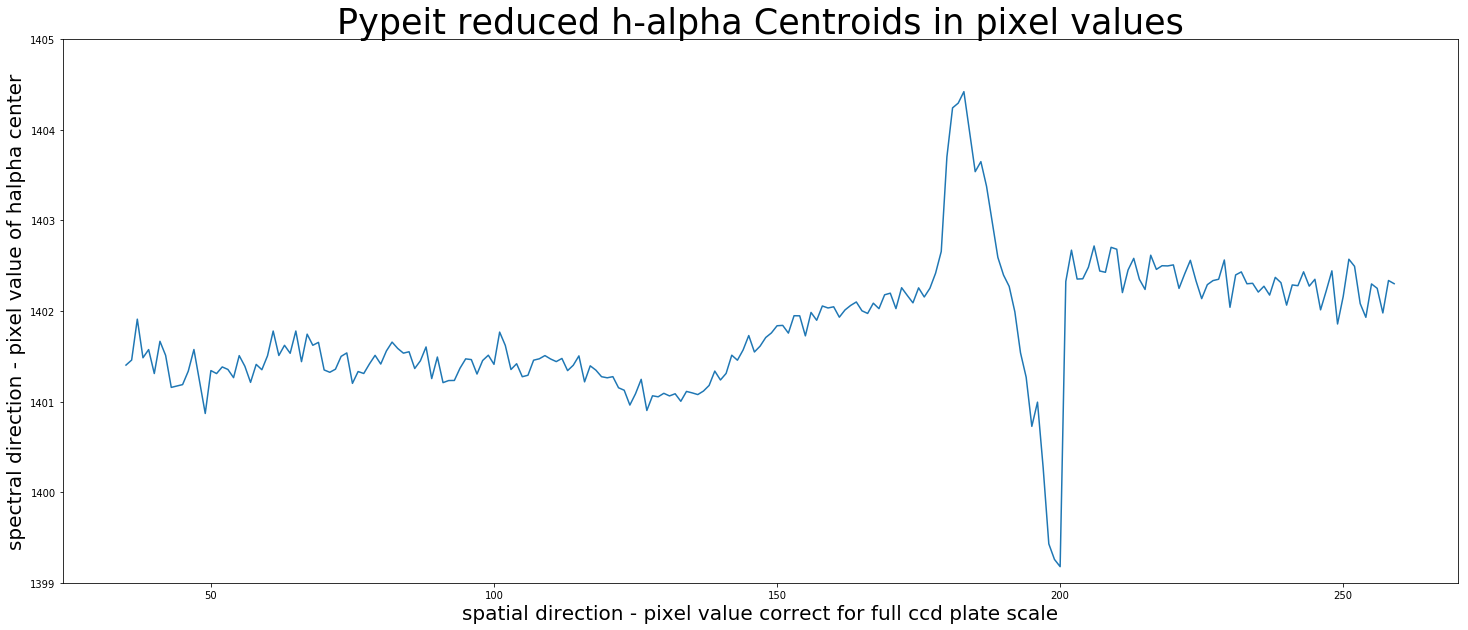

In [19]:
#checking centroids
#plotting
plt.figure(figsize=(25,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(target_spacepix_fullccd,centroid_specpix_fullccd)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('Pypeit reduced h-alpha Centroids in pixel values',fontsize=35)
plt.ylim(1399,1405)

## Science 1d _.txt_ files

In [14]:
# open .txt files---but can also read with a text editor

dim_options = ['1d', '2d'] #only 1d have .txt options
number_options = ['098', '099', '100', '101', '102', ] #original obs. log number
end_options = ['T112014.257','T112357.399','T112740.547','T113123.686','T113555.356'] #all beyond May18..until ext
ext_options = ['.fits','.txt'] #only 1d have .txt options and this code wont open .txt files

print('all 1D .txt FILES have these same columns AND can be read with a text editor:')
for i in range(len(number_options)):
    #establish filename
    specD = dim_options[0]
    fnumber = number_options[i]
    fend =  end_options[i]
    ext = ext_options[1]
    filename = 'spec{}_red0{}-79005021831220-Catch22_DBSPr_2017May18{}{}'.format(specD,fnumber,fend,ext)
    #open file
    science_file = 'reductions/p200_dbsp_red_A/Science/{}'.format(filename)
    f = open(science_file)
    print(f.readlines(1))
    f.close()
    break
print('\nNot really sure what these are for still --- Should explore more')

all 1D .txt FILES have these same columns AND can be read with a text editor:
['| slit |                    name | spat_pixpos | spat_fracpos | box_width | opt_fwhm |   s2n |\n']

Not really sure what these are for still --- Should explore more


# Examine QA png folder files -------------------------------------------------

In [15]:
print('For Arc_1dfit & Arc_tilts:')
print('want RMS < 0.1')
#for this target, all seem reasonably ok to use

For Arc_1dfit & Arc_tilts:
want RMS < 0.1


# Masters -- need nothing really ---------------------------------------------

In [16]:
# look as I would expect, not sure what to do with these other than note no catastrophic problems